In [1]:
%matplotlib inline
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from citipy import citipy
import seaborn as sns
from config import consumer_key, consumer_secret, access_token, access_token_secret


# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
#number_of_pages = 5
#Target Users
user_lst =('BBCNews', 'CBSNews','cnn','FoxNews', 'nytimes')
number_of_pages = len(user_lst)

In [4]:
now = time.strftime("%c")
the_date = time.strftime("%x")

In [5]:
#Initialize lists for the dictionary
source_list = []
tweet_texts = []            # Tweet Texts
tweet_times = []            # List to hold tweet timestamps
tweets_ago_list = []        # List for the data dictionary and dataframe

                            # Variables for holding sentiments from VADER
compound_list = []
positive_list = []
negative_list = []
neutral_list = []



for i in range(len(user_lst)):  # Loop through all the news sites

    target_user = user_lst[i]
    counter = 1                 # Counter to keep track of tweets ago
    oldest_tweet = None         # Variable for max_id



    for x in range(number_of_pages):       # Loop through tweet pages
        public_tweets = api.user_timeline(target_user, page=x)  # Get all tweets from home feed (for each page specified)
        
        for tweet in public_tweets:                             # Loop through all tweets

            print(tweet["text"])
        
            tweet_texts.append(tweet["text"])                   # Store Tweet in Array
        
            raw_time = tweet["created_at"]                      # Store Time in Array 
            print(raw_time)
            tweet_times.append(raw_time)                        # Append to time array for dictionary
        
                                                                # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])   # Use VADER
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
        
                                      
            oldest_tweet = tweet['id'] - 1                      # Get Tweet ID, subtract 1, and assign to oldest_tweet

                                                            # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            tweets_ago_list.append(counter)
            source_list.append(target_user)
        
            counter += 1                                        #Increment counter for last tweet
        

Record number of organ donors in 2017 https://t.co/ERPMBaRUsl
Mon Apr 09 23:53:09 +0000 2018
Antarctic expedition hopes for Ernest Shackleton bonus https://t.co/OoQW2ongwC
Mon Apr 09 23:44:05 +0000 2018
Good Friday Agreement played up, suggests Labour's Barry Gardiner https://t.co/MBiz78wr7m
Mon Apr 09 22:39:28 +0000 2018
Tuesday's Mail: "May’s war on prostate cancer" (via @hendopolis) #tomorrowspaperstoday https://t.co/budDbHK7lu
Mon Apr 09 21:43:45 +0000 2018
Tuesday's Times: "May under pressure to join strikes on Assad" (via @hendopolis) #tomorrowspaperstoday https://t.co/RYQOBdXAgJ
Mon Apr 09 21:40:28 +0000 2018
Tuesday's Mirror: "£250 million tax bill for 129 Prem stars" (via @hendopolis) #tomorrowspaperstoday https://t.co/laXhqisTUw
Mon Apr 09 21:40:22 +0000 2018
Tuesday's Guardian: "'Heinous' Syria attack could spark US military response, warns Trump" (via @hendopolis)… https://t.co/H7D4VOvWkv
Mon Apr 09 21:40:13 +0000 2018
Tuesday's Sun: "You’re dead" #tomorrowspaperstoday (via

Boy dies after falling ill in Edinburgh street https://t.co/P8cNqWyFwV
Mon Apr 09 10:18:50 +0000 2018
RT @BBCEngland: A council introduces fines of £80 for anyone caught feeding pigeons in a town centre after the birds were blamed for damagi…
Mon Apr 09 09:55:49 +0000 2018
RT @VictoriaLIVE: Children as young as 3 years old should have lessons to tackle gang violence - our debate panel suggests.

https://t.co/G…
Mon Apr 09 09:55:38 +0000 2018
Cassie Hayes: Man admits murdering travel agent https://t.co/dYiJhHJjMm
Mon Apr 09 09:50:03 +0000 2018
RT @VictoriaLIVE: A devastated mum describes the reality of knife crime - the heartbroken families left behind.

See our film &gt;&gt; https://t.…
Mon Apr 09 09:35:49 +0000 2018
RT @BBCSport: World record alert! 🚨

With her first throw, Holly Robinson sets a new record of 43.32m in the women's F47 javelin.

The prev…
Mon Apr 09 09:33:01 +0000 2018
RT @BBCSport: 🥈 It's silver for Sarah-Jane Perry.

What a nail-biting finish to an amazing match. 

J

For the past 24 years, Wang Mingqing has been searching for his daughter that he lost at his roadside fruit stand.… https://t.co/XBb20D0Wcj
Mon Apr 09 23:55:00 +0000 2018
When a truck slammed into the Humboldt Broncos' bus Friday, killing 15 team members and injuring more than a dozen… https://t.co/kY46szdWWO
Mon Apr 09 23:35:01 +0000 2018
Last week, people across the country heard stories about strange, zombie-like raccoons terrorizing a town in northe… https://t.co/Frs4k40bTV
Mon Apr 09 23:15:02 +0000 2018
"This is American history." Great-grandson of lynching victim faces the past. https://t.co/uT8QXzR6iv https://t.co/lgD48aNwsC
Mon Apr 09 23:07:47 +0000 2018
Facebook CEO Mark Zuckerberg is ready to tell Congress he's sorry. He faces a grilling tomorrow and Wednesday over… https://t.co/k10ujbnF0v
Mon Apr 09 23:03:02 +0000 2018
Medics describe smelling chlorine on survivors of apparent chemical attack in Syria that killed 40.… https://t.co/t7i7sTOubs
Mon Apr 09 23:00:39 +0000 2018
"T

First look at the 2019 Chevy Camaro: General Motors has taken extraordinary measures to keep the reboot of the clas… https://t.co/WC0PBfqIVp
Mon Apr 09 14:45:02 +0000 2018
Apple co-founder protests Facebook by closing his account https://t.co/Qbz1SSmfrn https://t.co/sorVxVlqmI
Mon Apr 09 14:30:01 +0000 2018
Dozens of students hurt when bus roof sheared off in overpass crash https://t.co/IiFLHDLT0u https://t.co/NoMlbo0mN7
Mon Apr 09 14:15:01 +0000 2018
Republicans return to work with Trump agenda in mind, scrambling to compile a to-do list to satisfy a president the… https://t.co/qP7KZjEu7q
Mon Apr 09 13:45:02 +0000 2018
After pulling Facebook ads, Mozilla exec says trust "isn't being earned" https://t.co/Boo2oRO2Z9 https://t.co/XiwijxW0nd
Mon Apr 09 13:30:01 +0000 2018
Trump says "to hell with it" about staff advice: AP https://t.co/xG62YDP4d3 https://t.co/JXzrtfllrT
Mon Apr 09 13:15:01 +0000 2018
President Trump seeks to ease fears about trade war with China https://t.co/AVB1SflRFT ht

RT @CNNSitRoom: A source close to the White House says Mueller’s decision to raid the offices of Michael Cohen could well push the Presiden…
Mon Apr 09 22:08:33 +0000 2018
The US Department of Justice announced that seven people associated with Backpage, a classified ads website, have b… https://t.co/9ljV0ps3PH
Mon Apr 09 22:07:14 +0000 2018
Encourage moves toward religious freedom by Islamic leaders | By Johnnie Moore via @CNNOpinion… https://t.co/fkIMeCysCL
Mon Apr 09 22:04:38 +0000 2018
The FBI just raided Michael Cohen's office. Here's what he still hasn't told us about the Stormy Daniels payment. |… https://t.co/9QXtOteWnz
Mon Apr 09 21:54:58 +0000 2018
More than 4,000 black men, women, and children died at the hands of white mobs between 1877 and 1950. This memorial… https://t.co/mSkXgTKkzo
Mon Apr 09 21:39:04 +0000 2018
The nonpartisan Congressional Budget Office has released its 10-year budget and economic outlook, and it projects t… https://t.co/qwSccoJfeO
Mon Apr 09 21:25:46 

.@SenJohnThune on Facebook, Mark Zuckerberg Congress testimony: “Clearly, there were lines that were crossed…I thin… https://t.co/8CrpPW7cVR
Mon Apr 09 23:57:52 +0000 2018
#Trump says Syria chemical attack 'will be met forcefully,' but won't say when https://t.co/IM8pb2L4xS
Mon Apr 09 23:51:43 +0000 2018
California appeals #Trump victory on border wall https://t.co/VnEZUeYPVn
Mon Apr 09 23:38:50 +0000 2018
.@seanspicer “My hope…is that this investigation continues to be focused very broadly on Russian interference. We c… https://t.co/PeWQLXF0dk
Mon Apr 09 23:26:17 +0000 2018
.@POTUS: “Why don’t I just fire Mueller? Well, I think it’s a disgrace, what’s going on. We’ll see what happens...A… https://t.co/LyIjKDcnYB
Mon Apr 09 23:05:00 +0000 2018
.@POTUS: “We are here to discuss Syria tonight…We’re making a decision as to what we do with respect to the horribl… https://t.co/pxYcDD7EMX
Mon Apr 09 22:58:23 +0000 2018
#Trump slams @FBI raid targeting attorney Michael Cohen, calls Mueller inv

Brandon Judd: 'When We Have the National Guard on the Border, the Cartels Take Notice' https://t.co/ekjweddTYh
Mon Apr 09 17:29:29 +0000 2018
Gov. @ScottWalker: Democrats' Rhetoric Ahead of Midterms Filled With 'Hatred and Anger' https://t.co/wf9kbtInq6
Mon Apr 09 17:15:47 +0000 2018
Puppy in Texas Rescued After Getting Head Stuck in Car Wheel https://t.co/rJwe7uUEpy
Mon Apr 09 16:47:47 +0000 2018
.@POTUS orders National Guard to the southern border https://t.co/0RXkQA4C3x
Mon Apr 09 16:36:06 +0000 2018
US Attorney John Lausch to oversee FISA warrant document release - via @brookefoxnews @JakeBGibson 
https://t.co/U6X5kS5ZCD
Mon Apr 09 16:25:49 +0000 2018
Solar storm could strike Earth this week: What you need to know https://t.co/ji311frJMA
Mon Apr 09 16:25:41 +0000 2018
US Attorney John Lausch to oversee FISA warrant document release https://t.co/9WPO96H5iu
Mon Apr 09 16:22:56 +0000 2018
Secretary Mattis on Possible US Military Action Against Assad: 'I Don't Rule Out Anything' https:

RT @nytopinion: With the help of the California courts, Stormy Daniels appears to be entering into a long-term relationship with the presid…
Mon Apr 09 23:53:05 +0000 2018
Full transcript of President Trump's remarks https://t.co/3vTKj27DcI
Mon Apr 09 23:42:00 +0000 2018
President Trump reacted angrily to the FBI’s raid on his personal lawyer’s office, calling it “disgraceful” and an… https://t.co/6fKnjSrfjT
Mon Apr 09 23:32:03 +0000 2018
RT @susanchira: Arizona shatters stereotypes of women in power -- from the left and from the right:  Year of the Woman? In Arizona, It’s Wo…
Mon Apr 09 23:17:04 +0000 2018
Federal prosecutors obtained the search warrant to raid Michael Cohen's office after receiving a referral from the… https://t.co/KpsAXGgQ8y
Mon Apr 09 23:02:04 +0000 2018
Evening Briefing: Here's what you need to know at the end of the day https://t.co/AdiSycZeI4
Mon Apr 09 22:47:03 +0000 2018
RT @NYTMetro: John Leland, Times reporter and author, is discussing his new book, “Happine

Big power tensions in the Syria conflict, already running high after an apparent chemical weapons attack, ratcheted… https://t.co/JAhWKLryfR
Mon Apr 09 14:00:05 +0000 2018
Tony Robbins, a life coach, apologized for saying women use #MeToo to gain "significance" https://t.co/ZEc5Hy3QpS
Mon Apr 09 13:45:05 +0000 2018
RT @PatrickKingsley: What would happen if a far-right leader cemented power in a western state? In Viktor Orban's Hungary, it's already hap…
Mon Apr 09 13:30:07 +0000 2018
Video: Did these women see #MeToo coming? https://t.co/NXZ3mPD44F
Mon Apr 09 13:20:05 +0000 2018
Friends of the art collector who died in a fire at Trump Tower said he had been trying to move since the election,… https://t.co/AADoOZvj7r
Mon Apr 09 13:11:10 +0000 2018
Morning Briefing: Here's what you need to know to start your day https://t.co/z6zdDPxTPo https://t.co/fsmzE3skCk
Mon Apr 09 13:00:27 +0000 2018
The post-campaign campaign of Donald Trump https://t.co/EFmeLFLJgX https://t.co/nwpMojrmlE
Mon Apr 

In [6]:
news_dic={'Source': source_list, 'Tweet':tweet_texts, 'Time': tweet_times,
          'Compound': compound_list, 'Positive':positive_list, 'Neutral':neutral_list ,'Negative': negative_list,
          'Tweets Ago': tweets_ago_list  }

In [7]:
news_df = pd.DataFrame.from_dict(news_dic)

In [8]:
news_df.head()

,Compound,Negative,Neutral,Positive,Source,Time,Tweet,Tweets Ago
0,0.0772,0.000,0.843,0.157,BBCNews,Mon Apr 09 23:53:09 +0000 2018,Record number of organ donors in 2017 https://...,1
1,0.7430,0.000,0.488,0.512,BBCNews,Mon Apr 09 23:44:05 +0000 2018,Antarctic expedition hopes for Ernest Shacklet...,2
2,0.8176,0.000,0.452,0.548,BBCNews,Mon Apr 09 22:39:28 +0000 2018,"Good Friday Agreement played up, suggests Labo...",3
3,-0.8519,0.480,0.520,0.000,BBCNews,Mon Apr 09 21:43:45 +0000 2018,"Tuesday's Mail: ""May’s war on prostate cancer""...",4
4,-0.3612,0.263,0.615,0.123,BBCNews,Mon Apr 09 21:40:28 +0000 2018,"Tuesday's Times: ""May under pressure to join s...",5


In [9]:
news_df.to_csv('example.csv')

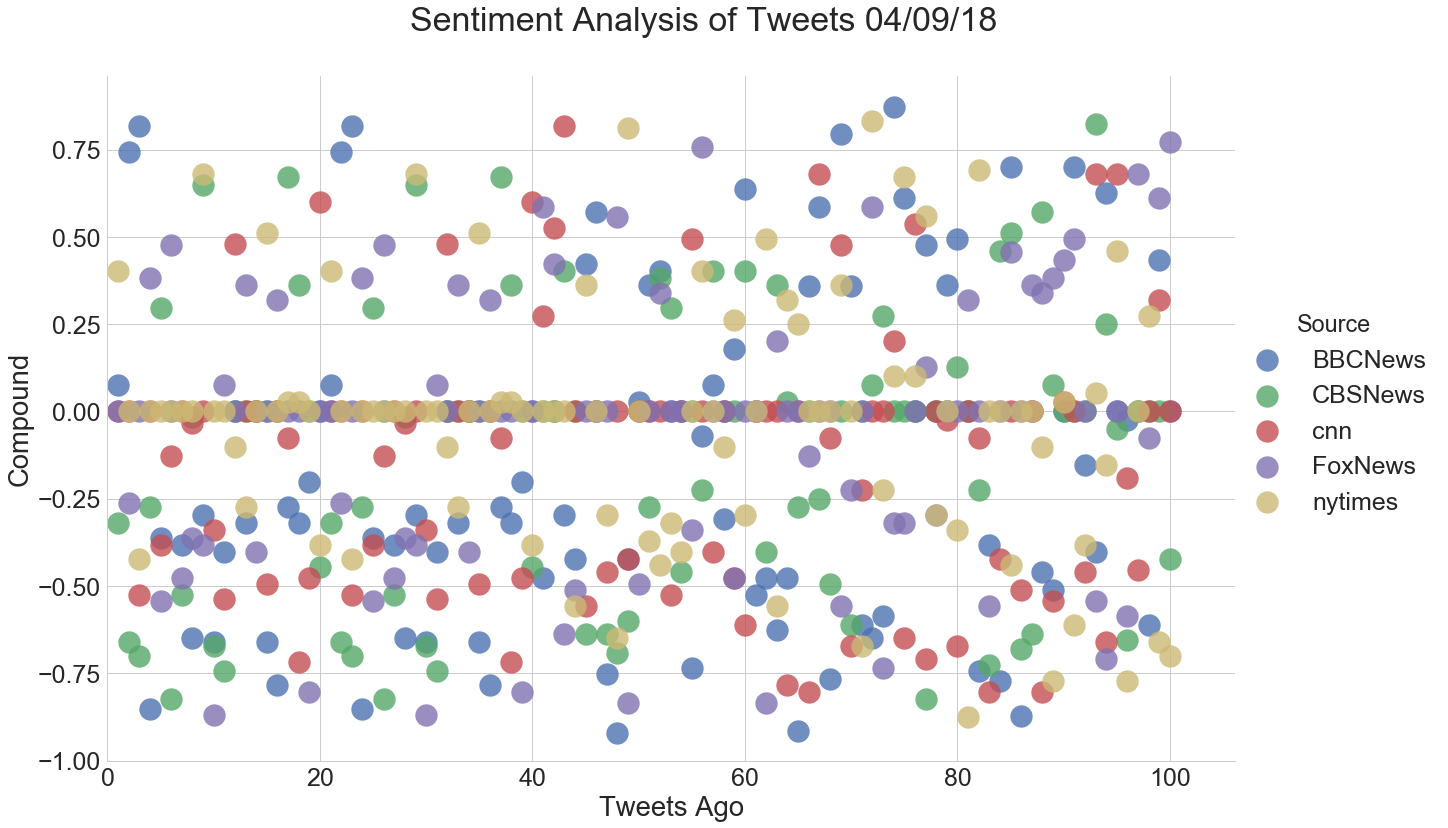

In [39]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# plot
sns.set_style("whitegrid", {'axes.grid' : True})


#sns.regplot(x="Tweets Ago", y="Compound", data=df, ax=ax, fit_reg=False)
g=sns.lmplot( x="Tweets Ago", y="Compound", data=news_df, fit_reg=False, hue='Source', 
             legend=True, size=12, aspect=1.5,scatter_kws={"s": 500})
sns.despine()
g.set(ylim=(-1, None), xlim=(0,None))
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Sentiment Analysis of Tweets ' + the_date, fontsize=34)
plt.savefig('scatter_sentiment.png')

In [40]:
median_array = [('Aggregate', ['Median'])]

for i in range(len(user_lst)):
    median_df=news_df[news_df['Source'] == user_lst[i]]
    x_median = np.mean(median_df['Compound'])
    x_median = round(x_median,4)
    temp = [x_median]
    temp_list = (user_lst[i],temp)
    median_array.append(temp_list)
    temp_list = ()

In [41]:
median_df = pd.DataFrame.from_items(median_array)

In [42]:
median_df

,Aggregate,BBCNews,CBSNews,cnn,FoxNews,nytimes
0,Median,-0.1395,-0.1073,-0.1254,-0.0571,-0.0303


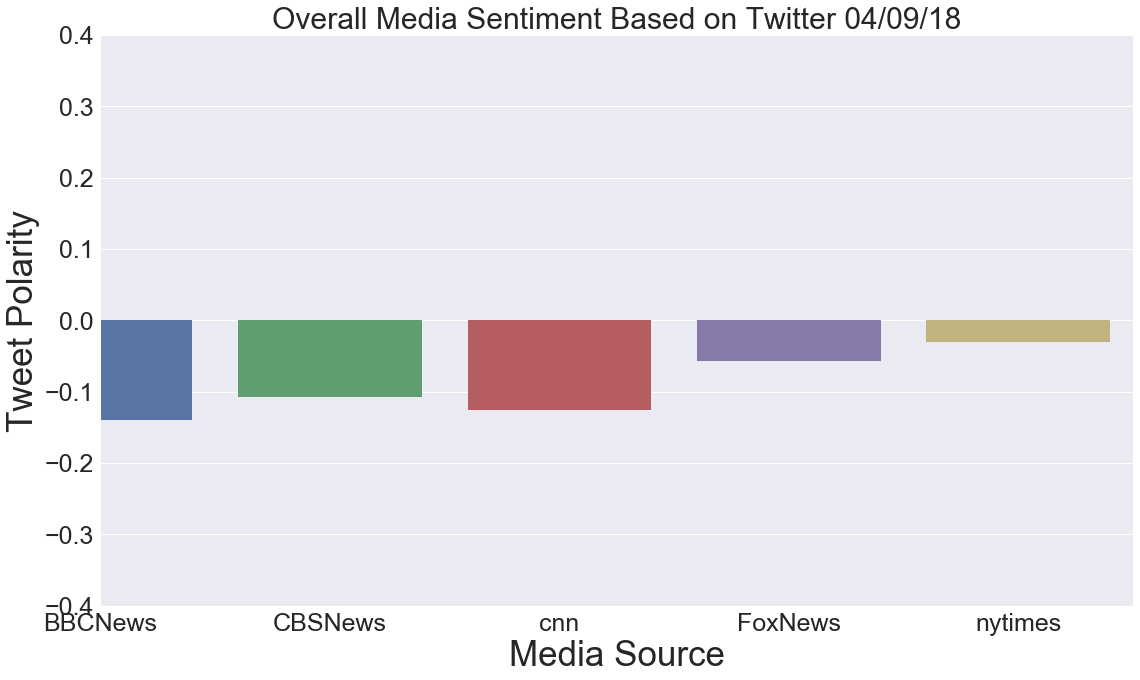

In [38]:
#sns.set_style("whitegrid")
sns.set_style("whitegrid", {'axes.grid' : True})
sns.set(font_scale=2.5)

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

ax = sns.barplot(data=median_df)
ax.set(ylim=(-0.4, 0.4), xlim=(0,None))
ax.set_title("Overall Media Sentiment Based on Twitter " + the_date,fontsize=30)
ax.set_xlabel("Media Source", size = 35)
ax.set_ylabel("Tweet Polarity", size = 35)
plt.savefig('polarity_plot.png')